**Data Cleaning**

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
import pickle
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [137]:
df=pd.read_excel("value_wise.xlsx")

In [138]:
df['Market'] = pd.to_datetime(df['Market'], format='%Y')
df['Market']=df['Market'].dt.year
df.set_index('Market', inplace=True)

In [139]:
df['Japan_Cbrt']=np.cbrt(df['Japan'])
df['USA_Cbrt']=np.cbrt(df['USA'])
df['European_Union_Cbrt']=np.cbrt(df['European_Union'])
df['China_Cbrt']=np.cbrt(df['China'])
df['South_East_Asia_Cbrt']=np.cbrt(df['South_East_Asia'])
df['Middle_East_Cbrt']=np.cbrt(df['Middle_East'])
df['Others_Cbrt']=np.cbrt(df['Others'])


In [140]:
def plot_series(historical_data, forecast_data):
    plt.figure(figsize=(12, 8))

    plt.subplot(3, 3, 1)
    plt.plot(historical_data.index, historical_data['Japan_Cbrt'], label='Historical ', color='blue')
    plt.plot(forecast_data.index, forecast_data['Japan_Cbrt'], label='Forecast ', linestyle='--', color='red')
    plt.title('Japan')

    plt.subplot(3, 3, 2)
    plt.plot(historical_data.index, historical_data['USA_Cbrt'], label='Historical ', color='blue')
    plt.plot(forecast_data.index, forecast_data['USA_Cbrt'], label='Forecast ', linestyle='--', color='red')
    plt.title('USA')

    plt.subplot(3, 3, 3)
    plt.plot(historical_data.index, historical_data['European_Union_Cbrt'], label='Historical ', color='blue')
    plt.plot(forecast_data.index, forecast_data['European_Union_Cbrt'], label='Forecast ', linestyle='--', color='red')
    plt.title('European Union')

    plt.subplot(3, 3, 4)
    plt.plot(historical_data.index, historical_data['China_Cbrt'], label='Historical ', color='blue')
    plt.plot(forecast_data.index, forecast_data['China_Cbrt'], label='Forecast ', linestyle='--', color='red')
    plt.title('China')

    plt.subplot(3, 3, 5)
    plt.plot(historical_data.index, historical_data['South_East_Asia_Cbrt'], label='Historical ', color='blue')
    plt.plot(forecast_data.index, forecast_data['South_East_Asia_Cbrt'], label='Forecast ', linestyle='--', color='red')
    plt.title('South East Asia')

    plt.subplot(3, 3, 6)
    plt.plot(historical_data.index, historical_data['Middle_East_Cbrt'], label='Historical ', color='blue')
    plt.plot(forecast_data.index, forecast_data['Middle_East_Cbrt'], label='Forecast ', linestyle='--', color='red')
    plt.title('Middle East')

    plt.subplot(3, 3, 7)
    plt.plot(historical_data.index, historical_data['Others_Cbrt'], label='Historical ', color='blue')
    plt.plot(forecast_data.index, forecast_data['Others_Cbrt'], label='Forecast ', linestyle='--', color='red')
    plt.title('Others')

    plt.tight_layout()
    plt.show()


**Determining stationarity of Data**

In [141]:
def stationary_test(dataframe,column):
  print("For the column {}".format(column))
  adftest=adfuller(dataframe[column],autolag=None)
  stats=pd.Series(adftest[1],index=['p-value'])
  print(stats)
  dataframe.dropna(inplace=True)

In [142]:
stationary_test(df,'Japan_Cbrt')
stationary_test(df,'USA_Cbrt')
stationary_test(df,'European_Union_Cbrt')
stationary_test(df,'China_Cbrt')
stationary_test(df,'South_East_Asia_Cbrt')
stationary_test(df,'Middle_East_Cbrt')
stationary_test(df,'Others_Cbrt')

For the column Japan_Cbrt
p-value    0.895391
dtype: float64
For the column USA_Cbrt
p-value    0.995727
dtype: float64
For the column European_Union_Cbrt
p-value    0.419236
dtype: float64
For the column China_Cbrt
p-value    1.0
dtype: float64
For the column South_East_Asia_Cbrt
p-value    0.963989
dtype: float64
For the column Middle_East_Cbrt
p-value    0.673405
dtype: float64
For the column Others_Cbrt
p-value    0.993898
dtype: float64


**Dividing Data into Training and Testing**

Total RMSE 2995.984099678947
Japan RMSE: 1595.1230283641205
USA RMSE: 4487.317558291726
European Union RMSE: 2211.7556270211494
China RMSE: 3743.4039975253195
South East Asia RMSE: 4571.952119272357
Middle East RMSE: 225.00942299949165
Others RMSE: 541.01466747856


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


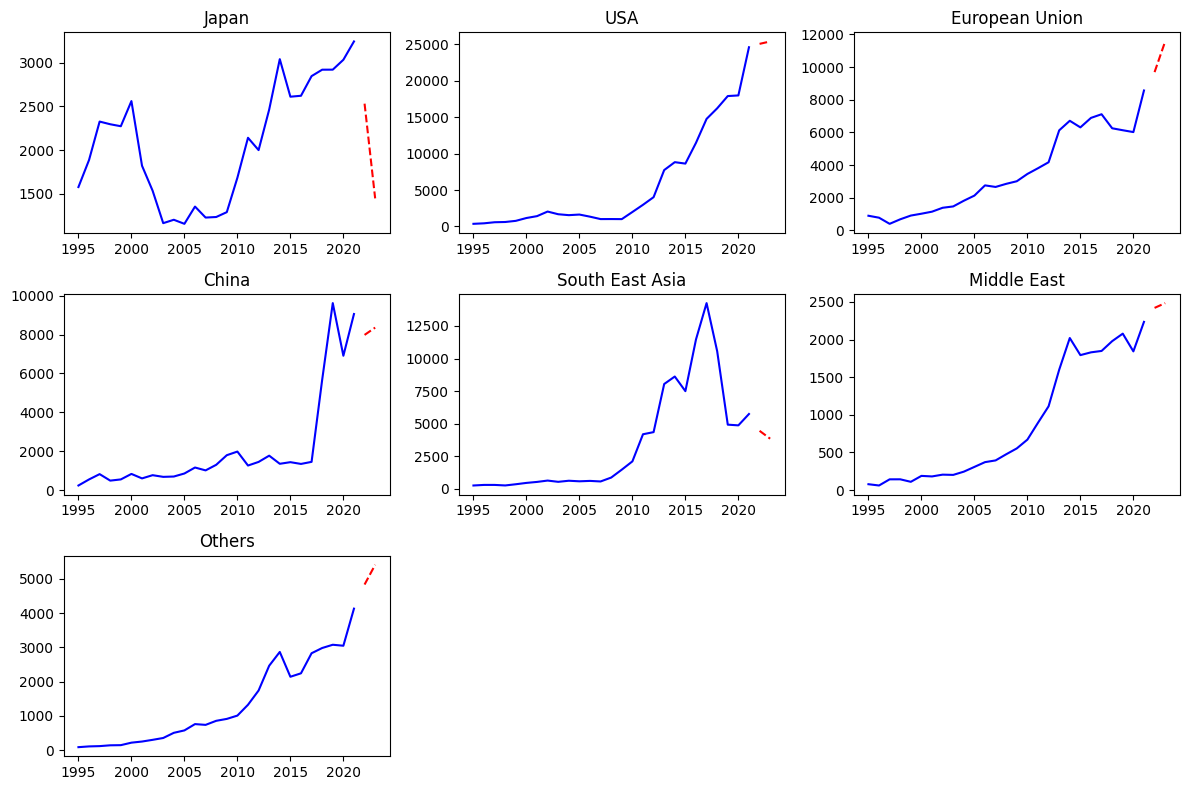

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 15, Jan, 2025
Time:                     13:32:16
--------------------------------------------------------------------
No. of Equations:         7.00000    BIC:                   -25.5299
Nobs:                     25.0000    HQIC:                  -29.2293
Log likelihood:           239.801    FPE:                1.80120e-13
AIC:                     -30.6492    Det(Omega_mle):     6.70999e-15
--------------------------------------------------------------------
Results for equation Japan_Cbrt
                             coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------------
const                           0.021924         0.149020            0.147           0.883
L1.Japan_Cbrt                   1.056089         0.247283            4.271           0.000
L1.USA_Cbrt    

In [143]:
train=df[['Japan_Cbrt', 'USA_Cbrt', 'European_Union_Cbrt',
       'China_Cbrt', 'South_East_Asia_Cbrt', 'Middle_East_Cbrt', 'Others_Cbrt']].iloc[0:27]

test=df[['Japan_Cbrt', 'USA_Cbrt', 'European_Union_Cbrt',
       'China_Cbrt', 'South_East_Asia_Cbrt', 'Middle_East_Cbrt', 'Others_Cbrt']].iloc[27:]
scaler = StandardScaler()
train_scaled = pd.DataFrame(scaler.fit_transform(train), columns=train.columns, index=train.index)
lag_order=2
model = VAR(train_scaled)
results=model.fit(maxlags=lag_order,method='gls-yule-walker')
forecast_scaled = results.forecast(train_scaled.values[-lag_order:], steps=len(test))
forecast = scaler.inverse_transform(forecast_scaled)
forecast_data = pd.DataFrame(forecast, index=test.index, columns=train.columns)
train=np.power(train,3)
test=np.power(test,3)
forecast_data=np.power(forecast_data,3)
from sklearn.metrics import mean_squared_error
print("Total RMSE {}".format(np.sqrt(mean_squared_error(test,forecast_data))))
print("Japan RMSE:", np.sqrt(mean_squared_error(test['Japan_Cbrt'], forecast_data['Japan_Cbrt'])))
print("USA RMSE:", np.sqrt(mean_squared_error(test['USA_Cbrt'], forecast_data['USA_Cbrt'])))
print("European Union RMSE:", np.sqrt(mean_squared_error(test['European_Union_Cbrt'], forecast_data['European_Union_Cbrt'])))
print("China RMSE:", np.sqrt(mean_squared_error(test['China_Cbrt'], forecast_data['China_Cbrt'])))
print("South East Asia RMSE:", np.sqrt(mean_squared_error(test['South_East_Asia_Cbrt'], forecast_data['South_East_Asia_Cbrt'])))
print("Middle East RMSE:", np.sqrt(mean_squared_error(test['Middle_East_Cbrt'], forecast_data['Middle_East_Cbrt'])))
print("Others RMSE:", np.sqrt(mean_squared_error(test['Others_Cbrt'], forecast_data['Others_Cbrt'])))
plot_series(train.dropna(),forecast_data.dropna())
print(results.summary())


**Using the Entire Data for Training and Testing**

Total RMSE 26383.145636095
Japan RMSE: 1676.523503277832
USA RMSE: 47092.15270632732
European Union RMSE: 27210.51988289404
China RMSE: 25489.03571569477
South East Asia RMSE: 27628.079247417292
Middle East RMSE: 9156.000263732116
Others RMSE: 20365.770308788407
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 15, Jan, 2025
Time:                     13:32:16
--------------------------------------------------------------------
No. of Equations:         7.00000    BIC:                   -21.3724
Nobs:                     28.0000    HQIC:                  -23.2222
Log likelihood:           114.403    FPE:                4.08030e-11
AIC:                     -24.0368    Det(Omega_mle):     7.02556e-12
--------------------------------------------------------------------
Results for equation Japan_Cbrt
                             coefficient       std. error           t-stat            prob
-------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


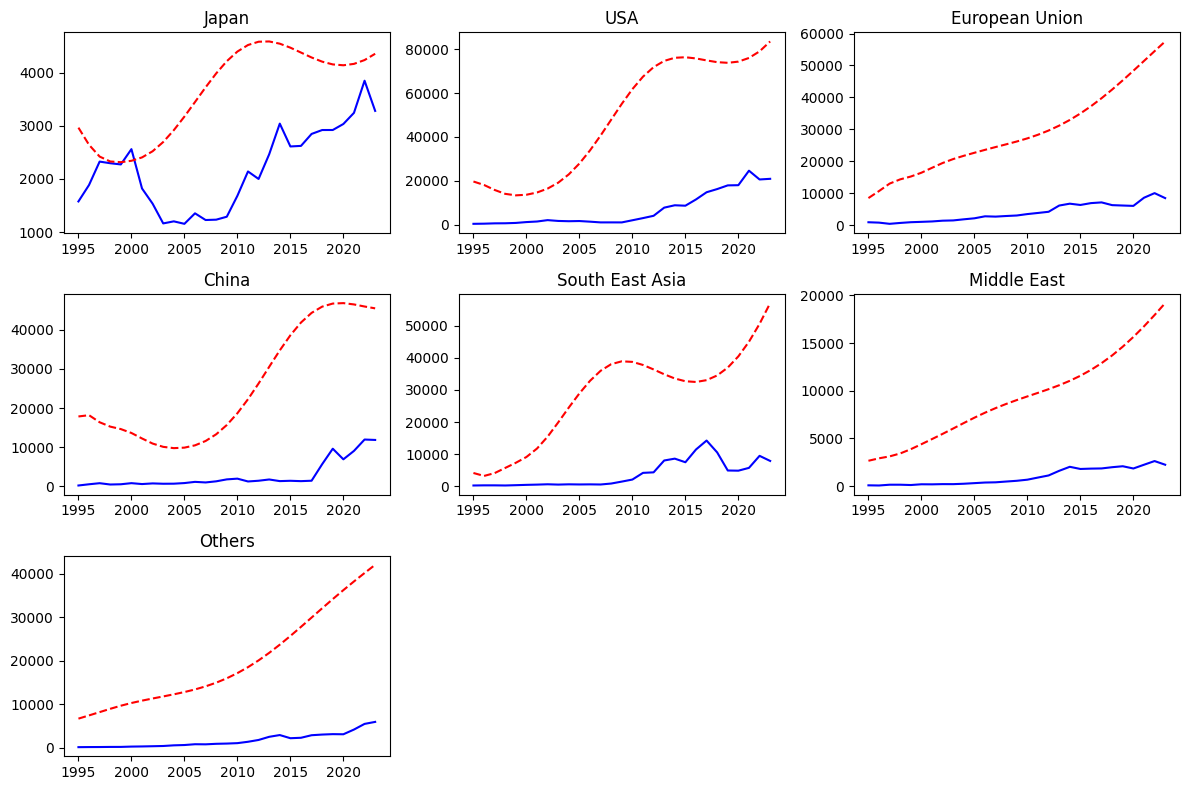

In [144]:
train=df[['Japan_Cbrt', 'USA_Cbrt', 'European_Union_Cbrt',
       'China_Cbrt', 'South_East_Asia_Cbrt', 'Middle_East_Cbrt', 'Others_Cbrt']]

test=train
scaler = StandardScaler()
train_scaled = pd.DataFrame(scaler.fit_transform(train), columns=train.columns, index=train.index)
lag_order=1
results = VAR(train_scaled)
results=results.fit(maxlags=lag_order,method='ols')
forecast_scaled = results.forecast(train_scaled.values[-lag_order:], steps=len(test))
forecast = scaler.inverse_transform(forecast_scaled)
forecast_data = pd.DataFrame(forecast, index=test.index, columns=train.columns)
test=np.power(test,3)
forecast_data=np.power(forecast_data,3)
from sklearn.metrics import mean_squared_error
print("Total RMSE {}".format(np.sqrt(mean_squared_error(test,forecast_data))))
print("Japan RMSE:", np.sqrt(mean_squared_error(test['Japan_Cbrt'], forecast_data['Japan_Cbrt'])))
print("USA RMSE:", np.sqrt(mean_squared_error(test['USA_Cbrt'], forecast_data['USA_Cbrt'])))
print("European Union RMSE:", np.sqrt(mean_squared_error(test['European_Union_Cbrt'], forecast_data['European_Union_Cbrt'])))
print("China RMSE:", np.sqrt(mean_squared_error(test['China_Cbrt'], forecast_data['China_Cbrt'])))
print("South East Asia RMSE:", np.sqrt(mean_squared_error(test['South_East_Asia_Cbrt'], forecast_data['South_East_Asia_Cbrt'])))
print("Middle East RMSE:", np.sqrt(mean_squared_error(test['Middle_East_Cbrt'], forecast_data['Middle_East_Cbrt'])))
print("Others RMSE:", np.sqrt(mean_squared_error(test['Others_Cbrt'], forecast_data['Others_Cbrt'])))
print(results.summary())
plot_series(test,forecast_data)
with open('model.pkl', 'wb') as file:
  pickle.dump(results, file)

**Function to be used for Deployment**

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
import pickle
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [146]:
def predict(x,region):
  train_data={
      'Japan_Cbrt':[1576.69, 1886.04, 2326.09, 2295.48, 2272.78, 2560.39, 1820.69, 1534.76, 1163.69, 1202.45, 1155.97, 1353.38, 1227.59, 1234.01, 1289.58, 1683.39, 2140.67, 1999.59, 2463.83, 3040.26, 2610.74, 2621.37, 2846.30, 2919.75, 2920.28, 3033.36, 3242.94, 3846.90, 3279.44],
      'USA_Cbrt':[366.26, 436.05, 583.75, 617.32, 775.35, 1164.40, 1421.38, 2051.12, 1682.06, 1556.09, 1639.24, 1347.80, 1016.94, 1021.55, 1012.52, 1990.26, 2977.53, 4026.48, 7744.67, 8830.12, 8633.40, 11482.16, 14769.83, 16220.00, 17904.37, 17990.40, 24603.34, 20600.35, 20892.44],
      'European_Union_Cbrt':[900.19, 781.10, 405.89, 682.61, 912.03, 1025.34, 1150.07, 1388.47, 1470.99, 1819.28, 2134.25, 2760.32, 2664.24, 2854.07, 3013.33, 3459.40, 3810.44, 4176.42, 6129.69, 6715.58, 6311.45, 6892.19, 7115.96, 6256.20, 6136.71, 6022.83, 8570.05, 10018.38, 8461.55],
      'China_Cbrt':[232.08, 543.45, 816.93, 483.02, 544.70, 827.42, 597.23, 762.48, 676.46, 693.25, 849.45, 1156.96, 1009.59, 1296.39, 1790.89, 1977.81, 1259.23, 1444.86, 1766.72, 1349.00, 1432.25, 1341.94, 1448.03, 5672.76, 9617.44, 6908.63, 9056.70, 11956.91, 11852.97],
      'South_East_Asia_Cbrt':[264.64, 308.66, 308.56, 267.95, 360.19, 462.97, 538.75, 642.38, 545.77, 628.83, 585.85, 616.70, 573.97, 873.09, 1479.55, 2114.48, 4193.27, 4357.28, 8046.59, 8620.85, 7499.16, 11461.83, 14250.26, 10561.31, 4929.90, 4876.05, 5747.98, 9494.02, 7907.28],
      'Middle_East_Cbrt':[77.64, 60.60, 142.39, 142.82, 109.49, 188.32, 181.06, 204.74, 201.52, 244.42, 307.65, 371.06, 393.96, 475.72, 553.55, 670.35, 894.38, 1113.34, 1599.37, 2020.86, 1793.67, 1830.58, 1849.10, 1979.34, 2079.12, 1843.39, 2235.53, 2623.05, 2238.82],
      'Others_Cbrt':[83.60, 105.46, 113.87, 137.67, 142.13, 215.05, 247.87, 297.36, 351.46, 502.37, 572.90, 757.30, 734.62, 853.11, 909.11, 1005.77, 1321.72, 1738.29, 2462.40, 2864.93, 2140.16, 2240.83, 2827.40, 2980.02, 3075.03, 3046.32, 4129.95, 5429.53, 5891.40]
  }
  train_data=pd.DataFrame(train_data)
  scaler=StandardScaler()
  train_scaled = pd.DataFrame(scaler.fit_transform(np.cbrt(train_data)),
                                columns=train_data.columns,
                                index=train_data.index)
  if(x<2025 or x>2030):
    return " Please enter the year within the range 2025-2030"
  with open('model.pkl','rb') as file:
    model=pickle.load(file)
  steps=x-2023
  lag_order = model.k_ar
  forecast_scaled = model.forecast(train_scaled.values[-lag_order:], steps=steps)
  forecast = scaler.inverse_transform(forecast_scaled)
  forecast_data = pd.DataFrame(forecast, columns=train_data.columns)
  forecast_data = np.power(forecast_data, 3)
  if(region=="Japan"):
    region='Japan_Cbrt'
  elif(region=="South East Asia"):
    region='South_East_Asia_Cbrt'
  elif(region=="China"):
    region='China_Cbrt'
  elif(region=="USA"):
    region='USA_Cbrt'
  elif(region=="European Union"):
    region='European_Union_Cbrt'
  elif(region=="Middle East"):
    region='Middle_East_Cbrt'
  elif(region=="Others"):
    region='Others_Cbrt'
  else:
    return "Please enter a valid region"
  region_data=forecast_data[region]
  forecast_years=[]
  for i in range(len(region_data)):
    print("Year {} Prediction {}".format(2023+i+1,region_data[i]))
    forecast_years.append(2023+i+1)
  years=np.arange(1995,2024)
  plt.figure(figsize=(10,6))
  plt.plot(years,train_data[region],marker="o",linestyle="--",label="Trend from 1995 to 2023")
  plt.plot(forecast_years,region_data.values,linestyle="-",label="Forecast value from 2024 till {}".format(x))




Year 2024 Prediction 8471.305469773832
Year 2025 Prediction 10671.346513963555
Year 2026 Prediction 13004.459677478382
Year 2027 Prediction 14334.428118252992


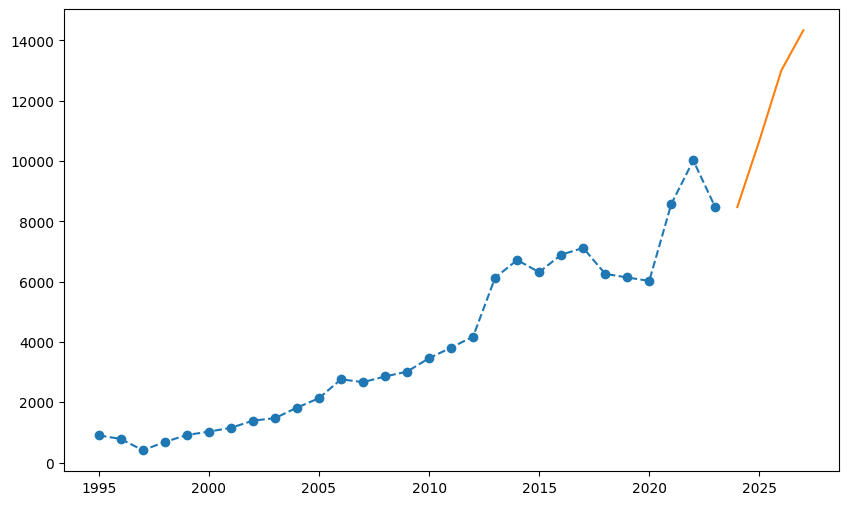

In [148]:
predict(2027,'European Union')

Year 2024 Prediction 19670.34419374491
Year 2025 Prediction 18090.817654229777
Year 2026 Prediction 15814.823963498475


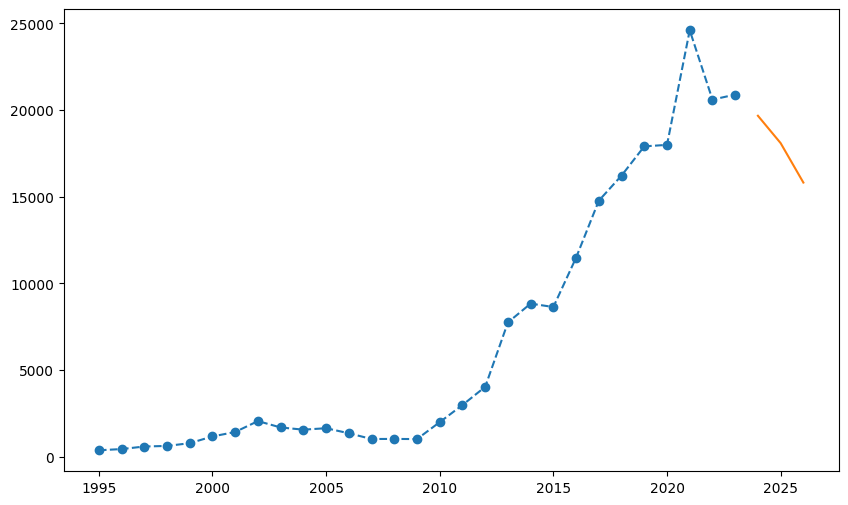

In [149]:
predict(2026,'USA')

Year 2024 Prediction 17844.28696572931
Year 2025 Prediction 18166.46520569296
Year 2026 Prediction 16366.446866086437
Year 2027 Prediction 15253.033579052411
Year 2028 Prediction 14623.380979721293


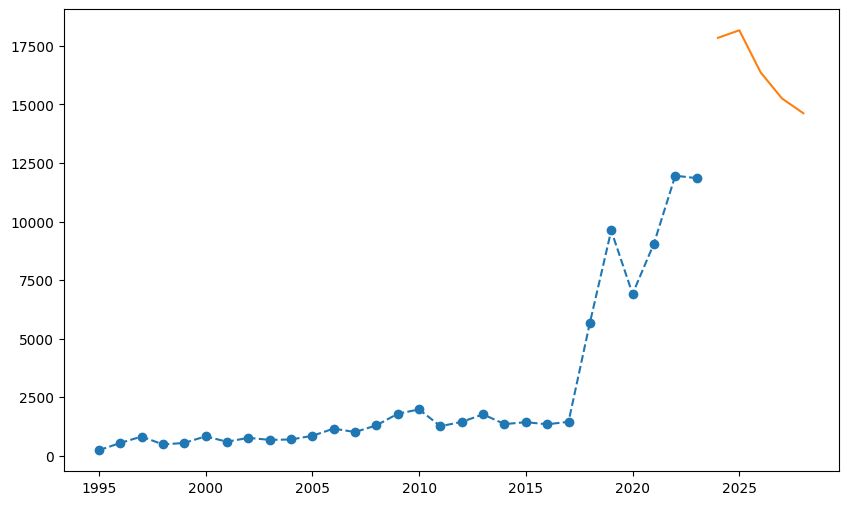

In [150]:
predict(2028,'China')